In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos dataset

In [16]:
# Importar el dataset
from google.colab import files

uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [17]:
churn = pd.read_csv('Churn_Modelling.csv')

In [18]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Analisis exploratorio de los datos

## Dataset Churn

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# borramos las columnas categóricas y aquellas numericas que no hacen sentido y generan ruido en el modelo.

churn.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1, inplace=True)

In [ ]:
churn[churn['Exited'] == 0]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,41,1,83807.86,1,0,1,112542.58,0
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
6,822,50,7,0.00,2,1,1,10062.80,0
8,501,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...
9993,644,28,7,155060.41,1,1,0,29179.52,0
9994,800,29,2,0.00,2,0,0,167773.55,0
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0


In [ ]:
# guardamos los atributos en un NumPy Array, ya que es el formato en el cual nos sklearn recibe los datos

X = churn.loc[:, churn.columns != 'Exited'].values
y = churn['Exited'].values

# Train/Test Spit

Vamos a necesitar separar nuestros datos en un conjunto para entrenar al modelo y otro para probarlo, esto nos va a servir para poder verificar la performance de nuestro modelo con datos que no conoce.

In [ ]:
from sklearn.model_selection import train_test_split  # una vez hacerlo a mano (con sample) así entienden bien de qué se trata

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 15,
                                                    stratify = y)

# KNN

In [ ]:
# Primero importamos la libreria de sklearn

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Entrenamos al modelo

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Las predicciones del test set son: \n {} '.format(y_pred))
print('Los y_test reales son: \n {} '.format(y_test))

Las predicciones del test set son: 
 [0 0 1 ... 0 0 0] 
Los y_test reales son: 
 [0 0 1 ... 0 0 0] 


In [ ]:
# Verifiquemos el accuracy del modelo

train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

print('El accuracy de prueba es de: {}'.format(train_accuracy))
print('El accuracy de test es de: {}'.format(test_accuracy))

El accuracy de prueba es de: 0.8037333333333333
El accuracy de test es de: 0.7896


## Predecir un nuevo valor

Una vez creado el modelo vamos a predecir que variedades serian los siguientes dos ejemplos.

In [ ]:
X_new = np.array([[619, 42, 8, 	137145.12, 3, 0, 0, 112542.58]])

In [ ]:
prediction = knn.predict(X_new)

In [ ]:
print('La clase predecida es: {}'.format(prediction))

La clase predecida es: [0]


## Overfitting-Underfitting: n_neighbors

Vamos a ver un poco graficamente el efecto del hiperparametro n_neighbors y como se relaciona con el concepto de Overfitting.

In [ ]:
scores = {'n_neighbors': [], 'Training accuracy': [], 'Test accuracy': []}

for i in range(1, 25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)

  scores['n_neighbors'].append(i)
  scores['Training accuracy'].append(knn.score(X_train, y_train))
  scores['Test accuracy'].append(knn.score(X_test, y_test))

scores = pd.DataFrame(scores)

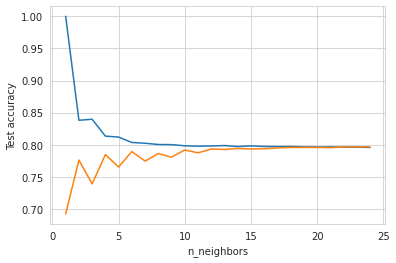

In [ ]:
# setear estilo de grafico

sns.set_style('whitegrid')

# Vamos a graficar las dos rectas encontradas

sns.lineplot(x = 'n_neighbors', 
             y = 'Training accuracy', 
             data = scores)

sns.lineplot(x = 'n_neighbors', 
             y = 'Test accuracy', 
             data = scores)

# Regresión Logística

Para trabajar con regresión logística, vamos a utilizar de la libreria de Sklearn del apartado de modelos lineales, la clase LogisticRegression. Para importarla simplemente la llamamos de la siguiente manera:

    from sklearn.linear_model import LogisticRegression

A continuación veremos como inicializar una instancia de dicha clase, como entrenar nuestro modelo y predecir nuevos valores.

Los Hiperparametros que vamos a estudiar de este modelo son:

- C: relacionado a la magnitud de regularización aplicada al modelo.
- penalty: que tipo de regularización sera utilizada, por defecto l2.

A tener en cuenta:

Al ser un modelo lineal, el resultado van a ser coeficientes que multiplican a los atributos y una ordenada al origen, pero como determinamos que clase es la correspondiente?

Por el signo, si es postivo predice una clase, si es negativo la otra clase.

IMPORTANTE!

El modo en el cual operamos con casi todos los modelos de sklearn es practicamente el mismo, con lo cual seguiremos los mismos pasos que en el modelo de KNN.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# separamos el dataset en test y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 15)

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

print('Los resultados son: \n')
print('El accuracy de prueba es de: {}'.format(lr.score(X_train, y_train)))
print('El accuracy de test es de: {}'.format(lr.score(X_test, y_test)))

Los resultados son: 

El accuracy de prueba es de: 0.7887142857142857
El accuracy de test es de: 0.794


## Interpretación de datos

Ahora interpretemos los datos que nos ofrecen los métodos de predict y predict_proba

El primero, es simplemente que clase se predice teniendo en cuenta que el corte de clasificación se encuentra en p = 0.5.

El segundo, nos brinda un arreglo con las probabilidades de cada una de las clases.

Investiguemos con algun ejemplo estos valores!

In [ ]:
lr.predict(X_test[:2])

array([0, 0])

In [ ]:
lr.predict_proba(X_test[:2])

array([[0.70865307, 0.29134693],
       [0.87209678, 0.12790322]])

**Cambio de umbral de predicción:**

Ahora bien, que pasa si queremos cambiar el umbral con el cual determinamos la clase correcta?

Facil! Accedemos al valor de la clase que queremos someter a otro umbral de todos los arreglos y lo sometemos a una comprobación logica. El resultado sera un arreglo con booleanos (que se transforman en 1 y 0)

**IMPORTANTE:** si queremos comparar correctamente las clases, deberíamos aplicarle la condición logica a la clase que finalmente llamamos 1
sino, nos estaría dando la clase opuesta!

In [ ]:
lr.predict_proba(X_test[:2])[:, 1] > 0.25

array([ True, False])

In [ ]:
# por ultimo volvemos a introducir el concepto de Confusion maxtrix visto en la teoria

from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[2352,   42],
       [ 576,   30]])

In [ ]:
# ahora vamos a ver el reporte de clasificación

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2394
           1       0.42      0.05      0.09       606

    accuracy                           0.79      3000
   macro avg       0.61      0.52      0.49      3000
weighted avg       0.73      0.79      0.72      3000



# Cross validation

**Pasos para la composición del código**

- Importar las librerias (LogisticRegression ya la tenemos importada asi que solo cross_val_score)

      from sklearn.model_selection import cross_val_score

- Inicializar el modelo (como siempre)
      lr = LogisticRegression()
- Inicializar cross validation
      cv_score = cross_val_score(modelo a utilizar, X, y, cv = cantidad de splits)

In [ ]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

cv_score = cross_val_score(lr, X, y, cv=5)

In [ ]:
cv_score

array([0.7915, 0.791 , 0.7935, 0.789 , 0.7885])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

Accuracy: 0.79 (+/- 0.00)
